In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

##Data Analysis

In [3]:
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1') 
data = df.iloc[:,:-1].values

In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   meanR   5656 non-null   float64
 1   meanG   5656 non-null   float64
 2   meanB   5656 non-null   float64
 3   stdR    5656 non-null   float64
 4   stdG    5656 non-null   float64
 5   stdB    5656 non-null   float64
 6   skewR   5656 non-null   float64
 7   skewG   5656 non-null   float64
 8   skewB   5656 non-null   float64
 9   kurR    5656 non-null   float64
 10  kurG    5656 non-null   float64
 11  kurB    5656 non-null   float64
 12  entR    5656 non-null   float64
 13  entG    5656 non-null   float64
 14  entB    5656 non-null   float64
 15  Class   5656 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 707.1 KB


In [5]:
df.head(5)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,17.395776,18.057278,4.548844,40.818315,42.747400,15.235375,2.080558,2.117612,4.194824,2.786645,2.922868,18.932746,11.312396,11.302187,10.864530,1
1,17.048930,17.143965,4.285857,41.389466,42.116279,14.243516,2.185737,2.233318,4.195780,3.243245,3.436646,19.700106,11.256998,11.242310,10.867538,1
2,19.957301,16.498584,5.082156,48.724795,40.816921,15.203335,2.169338,2.245723,3.863509,3.069086,3.474671,17.313374,11.242156,11.228013,11.041794,1
3,19.713066,18.029258,4.707696,47.484912,43.629222,14.230307,2.135099,2.147982,3.987222,2.920590,2.926331,18.956953,11.266421,11.260806,11.034323,1
4,17.383914,14.581238,4.632718,46.006665,38.900382,14.446719,2.417031,2.458251,3.903999,4.259136,4.460186,17.438845,11.103429,11.094264,10.944285,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,20.894382,5.260718,6.854176,17.015386,20.055104,23.933250,46.994451
meanG,5656.0,18.023509,3.885058,6.259336,15.462487,17.823574,20.508286,37.866338
meanB,5656.0,5.562521,1.572465,1.823841,4.469088,5.206807,6.298417,14.023399
stdR,5656.0,49.518673,9.091646,23.889681,42.518804,48.737837,55.533851,78.573397
stdG,5656.0,43.181128,5.799811,21.816707,39.565446,43.274979,47.258675,63.912439
stdB,5656.0,16.216090,2.737406,7.831019,14.261454,15.830328,17.684630,29.260652
skewR,5656.0,2.164332,0.298941,1.154889,1.962475,2.147151,2.337118,3.582313
skewG,5656.0,2.232326,0.340901,1.203163,2.003130,2.188874,2.405244,3.997579
skewB,5656.0,3.745612,0.647198,1.944842,3.304125,3.764237,4.170742,7.961952
kurR,5656.0,3.208423,1.533598,-0.531692,2.161075,3.023438,3.989808,12.941081


In [7]:
df.isna()

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5652,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5653,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5654,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
print(df['Class'].drop_duplicates())
class_labels = df['Class'].values

0       1
448     2
2185    3
2576    4
4085    5
4459    6
Name: Class, dtype: int64


###EDA

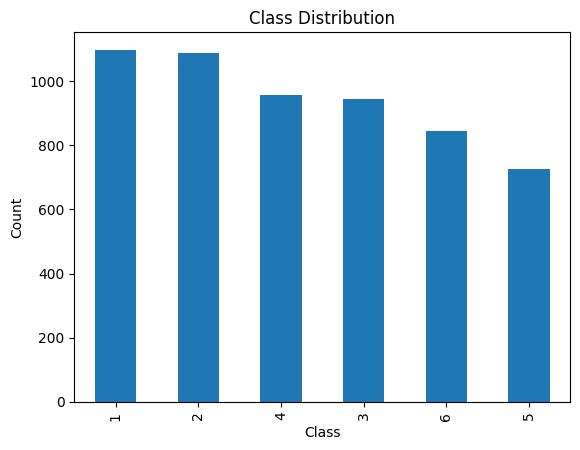

In [9]:
#CEk class imbalance
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


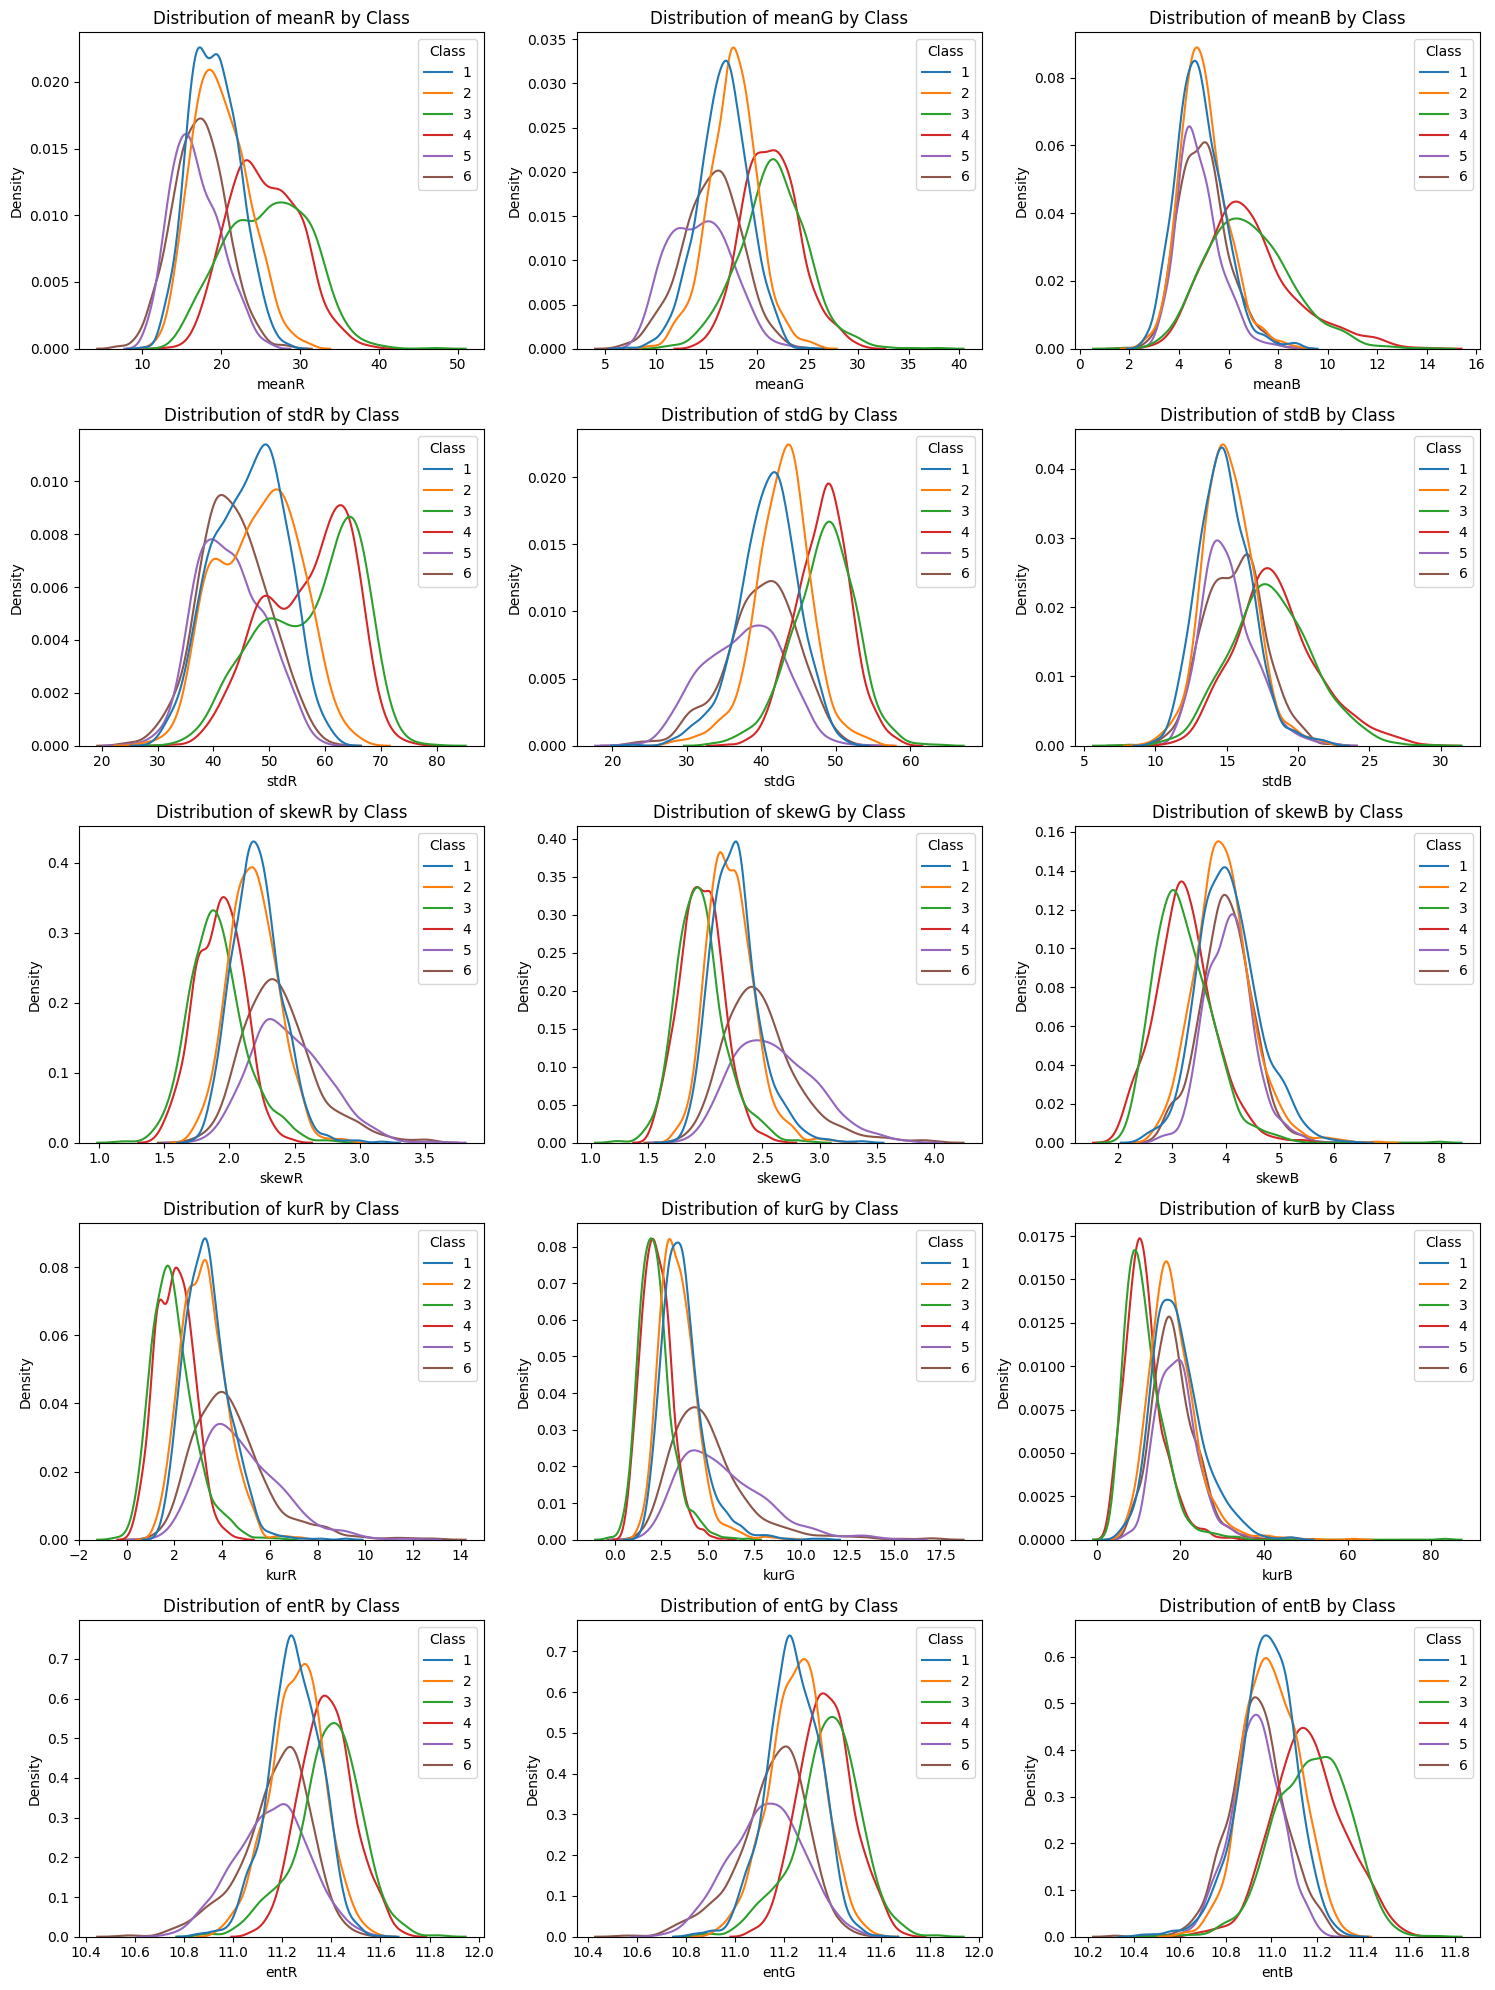

In [10]:
features = df.columns[:-1]  # All features except the class

plt.figure(figsize=(15, 20))
for i, feature in enumerate(df.columns[:-1], 1):  # All features except 'Class'
    plt.subplot(5, 3, i)
    sns.kdeplot(data=df, x=feature, hue="Class", fill=False, palette="tab10")
    plt.title(f'Distribution of {feature} by Class')
plt.tight_layout()
plt.show()

In [11]:
#Fitur dengan varians tertinggi
variances = np.var(data, axis=0)
best_feature_index = np.argmax(variances) 
print(best_feature_index)

3


In [12]:
from scipy.stats import pearsonr

correlations = [pearsonr(data[:, i], df['Class'])[0] for i in range(data.shape[1])]
best_feature_index = np.argmax(correlations)
print(best_feature_index)


10


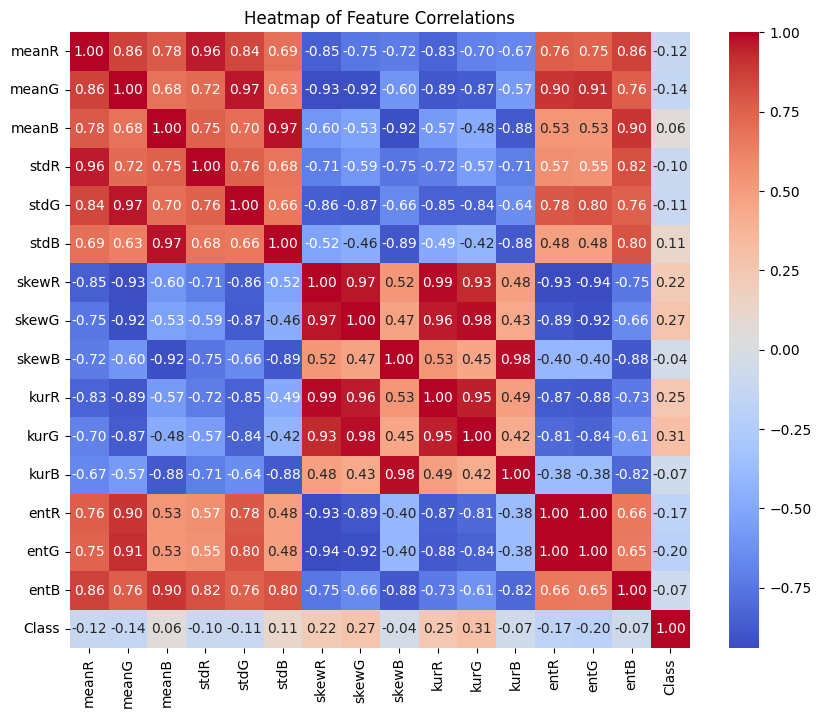

In [13]:
#Cek Heatmap Fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()

In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

# Load dataset
df = pd.read_excel('dataset.xlsx', sheet_name='Sheet1')

# Pisahkan fitur dan label kelas
features = df.iloc[:, :-1].values
feature_names = df.columns[:-1]
class_labels = df['Class'].values

# Pendekatan 2: Principal Component Analysis (PCA)
pca = PCA(n_components=1)
principal_component = pca.fit_transform(features)

# Ambil kontribusi tiap fitur dalam komponen utama
pca_contribution = abs(pca.components_[0])

# Pendekatan 3: Feature Importance dengan Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(features, class_labels)
feature_importances = rf.feature_importances_

# Pendekatan 4: Information Gain (Mutual Information)
mutual_info = mutual_info_classif(features, class_labels)

# Gabungkan hasil ke dalam DataFrame untuk perbandingan
results = pd.DataFrame({
    'Feature': feature_names,
    'PCA Contribution': pca_contribution,
    'Random Forest Importance': feature_importances,
    'Mutual Information': mutual_info
})

# Tampilkan hasil
print(results)


   Feature  PCA Contribution  Random Forest Importance  Mutual Information
0    meanR          0.383583                  0.069365            0.316083
1    meanG          0.248781                  0.074920            0.347515
2    meanB          0.100655                  0.052813            0.221135
3     stdR          0.655776                  0.081854            0.280638
4     stdG          0.384740                  0.085989            0.328028
5     stdB          0.163276                  0.060006            0.177946
6    skewR          0.018031                  0.065140            0.344414
7    skewG          0.018584                  0.066879            0.345075
8    skewB          0.041176                  0.059155            0.223837
9     kurR          0.092309                  0.066964            0.349935
10    kurG          0.099430                  0.083406            0.360643
11    kurB          0.393822                  0.065145            0.241694
12    entR          0.007

In [15]:
#Cek outlier
def cek_outlier(data):
    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12))
    fig.suptitle('Boxplots of Each Feature to Detect Outliers')

    features = data.columns[:-1]  # All features excluding the 'Class' column
    for i, feature in enumerate(features):
        sns.boxplot(data=data, y=feature, ax=axes[i // 5, i % 5])
        axes[i // 5, i % 5].set_title(f'{feature}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    

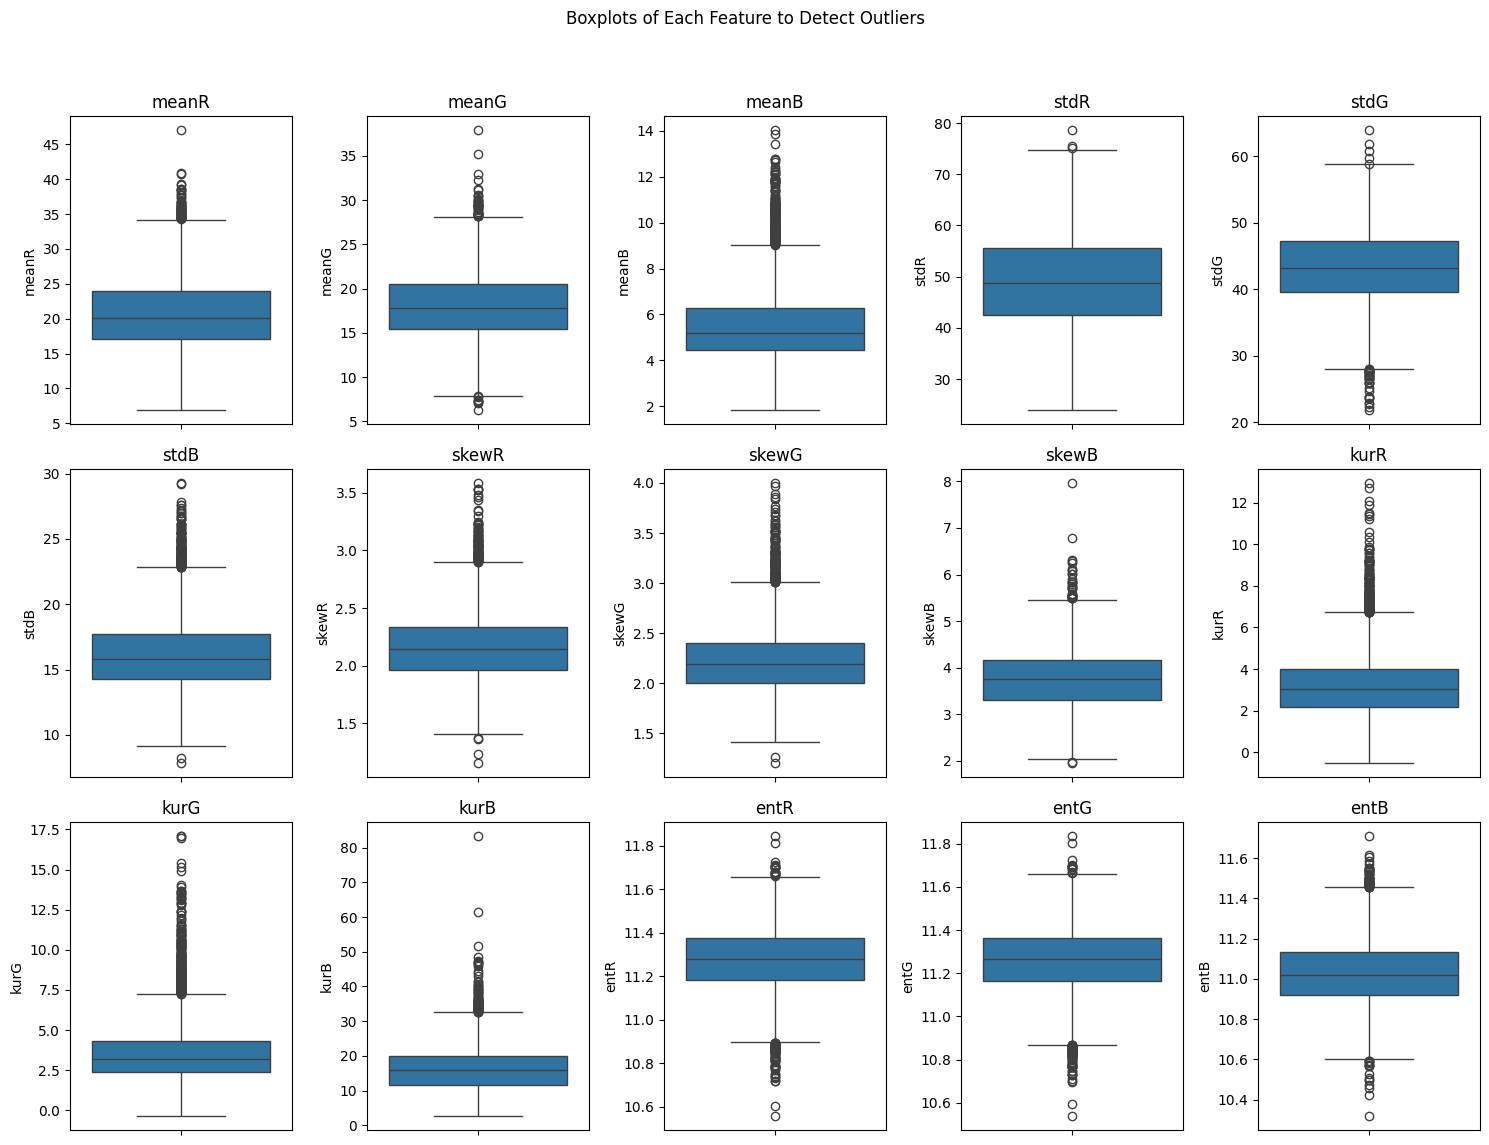

In [16]:
cek_outlier(df)

###Preprocessing

In [17]:
#Standarization
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df.copy())
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head(3)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB,Class
0,-0.665102,0.008693,-0.644699,-0.957046,-0.074790,-0.358296,-0.280260,-0.336533,0.694148,-0.275050,-0.357389,0.413462,0.260530,0.270445,-1.030791,-1.344481
1,-0.731039,-0.226412,-0.811958,-0.894219,-0.183617,-0.720664,0.071609,0.002909,0.695626,0.022708,-0.088418,0.532731,-0.107272,-0.118157,-1.012572,-1.344481
2,-0.178144,-0.392545,-0.305512,-0.087327,-0.407671,-0.370002,0.016748,0.039301,0.182180,-0.090864,-0.068511,0.161766,-0.205810,-0.210945,0.042868,-1.344481


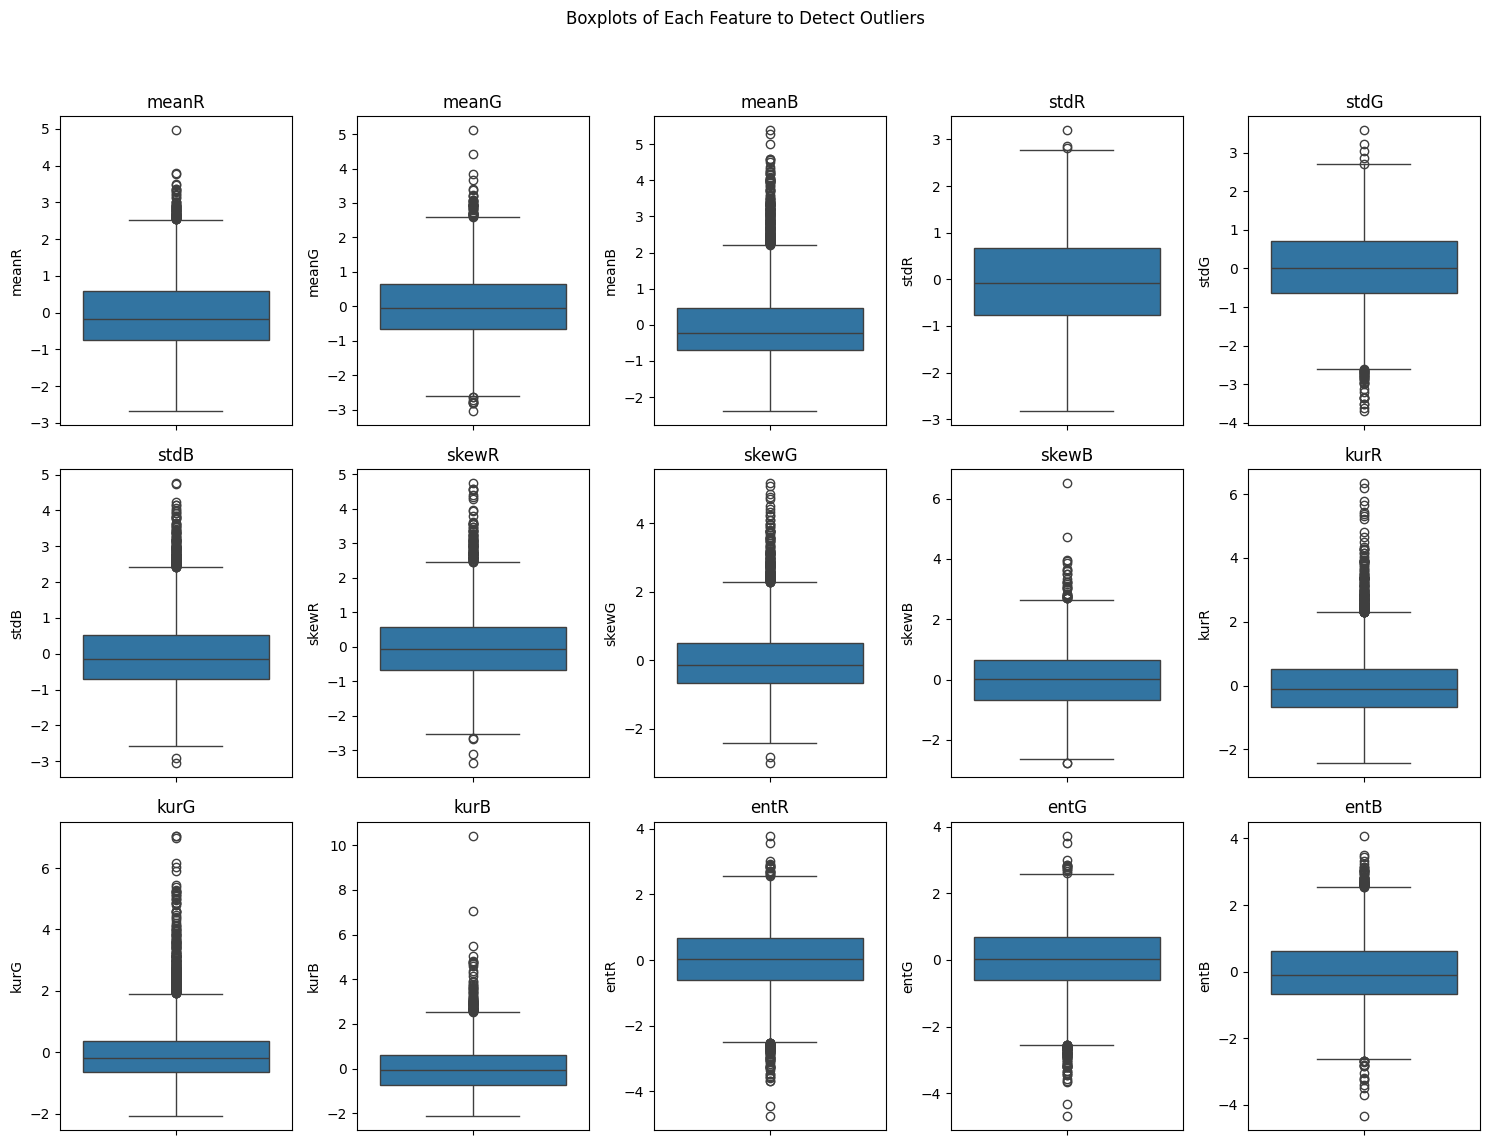

In [18]:
cek_outlier(df_scaled)

In [19]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
meanR,5656.0,-1.005011e-16,1.000088,-2.669112,-0.737416,-0.159551,0.577704,4.961751
meanG,5656.0,-4.422048e-16,1.000088,-3.028324,-0.659256,-0.051467,0.639629,5.107925
meanB,5656.0,-2.814031e-16,1.000088,-2.377802,-0.695424,-0.226234,0.468031,5.381122
stdR,5656.0,-1.507516e-16,1.000088,-2.819210,-0.769991,-0.085893,0.661674,3.196043
stdG,5656.0,3.015033e-16,1.000088,-3.683966,-0.623469,0.016183,0.703110,3.574796
stdB,5656.0,-5.427059e-16,1.000088,-3.063416,-0.714110,-0.140935,0.536519,4.765722
skewR,5656.0,2.512527e-16,1.000088,-3.377029,-0.675300,-0.057478,0.578044,4.743765
skewG,5656.0,-1.226113e-15,1.000088,-3.019221,-0.672386,-0.127475,0.507283,5.178659
skewB,5656.0,2.010022e-16,1.000088,-2.782655,-0.682211,0.028780,0.656936,6.515335
kurR,5656.0,-3.819042e-16,1.000088,-2.439000,-0.682996,-0.120632,0.509556,6.346853


In [20]:
#Split Dataset
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X.head(3)

,meanR,meanG,meanB,stdR,stdG,stdB,skewR,skewG,skewB,kurR,kurG,kurB,entR,entG,entB
0,-0.665102,0.008693,-0.644699,-0.957046,-0.074790,-0.358296,-0.280260,-0.336533,0.694148,-0.275050,-0.357389,0.413462,0.260530,0.270445,-1.030791
1,-0.731039,-0.226412,-0.811958,-0.894219,-0.183617,-0.720664,0.071609,0.002909,0.695626,0.022708,-0.088418,0.532731,-0.107272,-0.118157,-1.012572
2,-0.178144,-0.392545,-0.305512,-0.087327,-0.407671,-0.370002,0.016748,0.039301,0.182180,-0.090864,-0.068511,0.161766,-0.205810,-0.210945,0.042868


In [22]:
y.head(10)

0   -1.344481
1   -1.344481
2   -1.344481
3   -1.344481
4   -1.344481
5   -1.344481
6   -1.344481
7   -1.344481
8   -1.344481
9   -1.344481
Name: Class, dtype: float64

###Dimension Reduction

In [23]:
#Dimension Reduction PCA

pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_train)

In [24]:
# Plot sebagai strip plot

def plot_dimension(data):
    plt.scatter(data[:, 0], y_train, c=y_train, cmap='tab10', alpha=0.7)
    plt.colorbar(ticks=range(len(y.unique())), label='Class')
    plt.title("t-SNE Dimensionality Reduction (1D)")
    plt.xlabel("t-SNE 1")
    plt.ylabel("Class")
    plt.show()

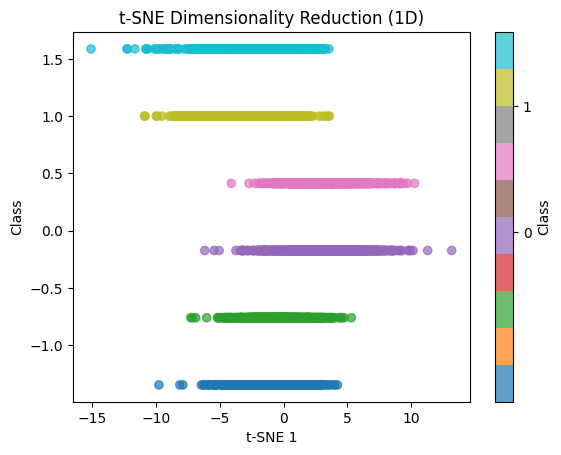

In [25]:
plot_dimension(X_pca)

In [26]:
loading_df = pd.DataFrame(pca.components_, columns=X_train.columns, index=[f'PC{i+1}' for i in range(15)])

print(loading_df)

         meanR     meanG     meanB      stdR      stdG      stdB     skewR  \
PC1   0.276654  0.283354  0.245427  0.247761  0.276609  0.226849 -0.279171   
PC2  -0.049022  0.130582 -0.329718 -0.157556  0.058276 -0.355776 -0.216961   
PC3   0.466771 -0.078050 -0.191213  0.683571 -0.006171 -0.340707 -0.047833   
PC4   0.219339  0.072723  0.190814  0.058140 -0.156394  0.207173  0.006948   
PC5   0.057337  0.407947 -0.009317  0.097302  0.644107  0.204533  0.199738   
PC6   0.036232 -0.196161  0.425869  0.089237 -0.211149  0.465762 -0.078980   
PC7  -0.108216  0.192273  0.204989 -0.188920  0.271068 -0.210929  0.083037   
PC8   0.292710  0.185365  0.179194  0.025009 -0.363879 -0.231391  0.240764   
PC9  -0.171457 -0.377734 -0.249673  0.310362  0.139244  0.226001  0.423630   
PC10  0.268815  0.258905 -0.279419 -0.194399 -0.229609  0.255982 -0.155762   
PC11  0.266146 -0.027140  0.424138 -0.217247  0.055963 -0.323781  0.193330   
PC12 -0.248927 -0.287459  0.410121  0.181547  0.179695 -0.282758

In [27]:
#Dimension Reduction TSNE
tsne = TSNE(n_components=2, perplexity=21, n_iter=1269, random_state=42, learning_rate = 18.896459784706366)
X_tsne = tsne.fit_transform(X_train)

d:\Kuliah\JST\Neural-Network-Final-Project\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


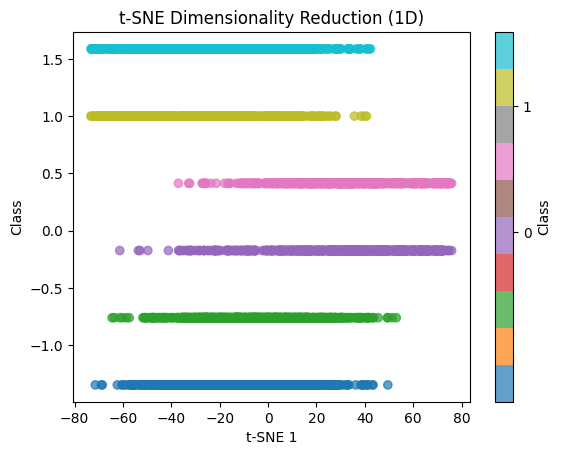

In [28]:
plot_dimension(X_tsne)

###Building Model

In [29]:
class SOMlinier:
    def __init__(self, m, fitur, R, alpha, tau):
        self.m = m 
        self.fitur = fitur 
        self.w = np.random.rand(m, fitur) 
        self.R0 = R 
        self.alpha0 = alpha
        self.tau = tau
    
    def hitung_bmu(self, x):
        # Menghitung jarak antara x dan setiap neuron
        D = np.linalg.norm(self.w - x, axis=1)
        # Kembalikan indeks dari BMU (neuron dengan jarak terdekat)
        return np.argmin(D)
    
    def hitung_second_bmu(self, x):
        # Menghitung jarak antara x dan setiap neuron
        D = np.linalg.norm(self.w - x, axis=1)
        # Urutkan indeks jarak, ambil indeks kedua terdekat
        return np.argsort(D)[1]
    
    def update_bobot(self, x, j, R, alpha):
        for i in range(self.m):
            jarak = abs(i - j)
            if jarak <= R:
                influence = np.exp(-jarak**2 / (2 * (R**2)))
                self.w[i] += alpha * influence * (x - self.w[i])
    
    def kurangi_radius(self, iterasi):
        return self.R0 * np.exp(-iterasi / self.tau)

    def kurangi_learning_rate(self, iterasi):
        return self.alpha0 * np.exp(-iterasi / self.tau)

    def train(self, data, n_iterasi):
        for t in range(n_iterasi):
            x = data[np.random.randint(0, len(data))]
            j = self.hitung_bmu(x)
            R = self.kurangi_radius(t)
            alpha = self.kurangi_learning_rate(t)
            self.update_bobot(x, j, R, alpha)

    def quantization_error(self, data):
        # Menghitung Quantization Error (QE) sebagai rata-rata jarak antara data dan BMU-nya
        total_error = np.mean([np.linalg.norm(x - self.w[self.hitung_bmu(x)]) for x in data])
        return total_error
    
    def topographic_error(self, data):
        # Menghitung Topographic Error (TE)
        errors = 0
        for x in data:
            bmu = self.hitung_bmu(x)
            second_bmu = self.hitung_second_bmu(x)
            # Cek jika BMU dan second BMU bertetangga (bedanya hanya 1 di grid linear)
            if abs(bmu - second_bmu) > 1:
                errors += 1
        te = errors / len(data)
        return te

In [30]:
X_train_np = X_train.values  # Ubah X_train dari DataFrame ke numpy array

# Inisialisasi SOM tanpa PCA dan t-SNE
m = 15
fitur = X_train_np.shape[1]  # Sesuaikan fitur berdasarkan dimensi X_train_np
R = 1
alpha0 = 0.11571090995138311
tau = 984

som_normal = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train SOM dengan data tanpa PCA dan t-SNE
n_iterations = 982
som_normal.train(X_train_np, n_iterations)

# Akses bobot SOM yang telah dilatih
weights_normal = som_normal.w
print("Trained SOM weights:", weights_normal)

Trained SOM weights: [[ 0.41759092  0.49875113  0.45752879  0.46009215  0.07592862  0.70869641
   0.50076607  0.68423421  0.779448    0.1119535   0.35740402  0.70362944
   0.22788265  0.214941    0.82456589]
 [-1.42790716 -1.78027213 -0.93497032 -1.22685179 -1.80803788 -0.86212614
   2.21682405  2.28973236  1.02023127  2.38624003  2.42196083  1.04753429
  -1.99223754 -2.04951631 -1.44188201]
 [-0.70781548 -0.7907361  -0.56422439 -0.60108889 -0.73985255 -0.51935163
   0.71594289  0.70075338  0.48119226  0.65475356  0.60865802  0.43023891
  -0.70883214 -0.72178168 -0.61849916]
 [ 0.68917093  0.88227674  0.88478159  0.58375257  0.63297756  0.97469808
   0.01227622  0.91874828  0.52230284  0.85864409  0.58368372  0.3858227
   0.59177038  0.56995548  0.79861843]
 [ 0.78619396  0.44645063  0.13315643  0.10649497  0.91531709  0.78661986
   0.52986226  0.62730745  0.57630641  0.32901116  0.28546522  0.64084267
   0.33517666  0.57891422  0.44390646]
 [ 0.39559505  0.27006851  0.47030978  0.1612

In [31]:
# Dengan PCA
m = 13      
fitur = 15
R = 2  
alpha0 = 0.10984552911262954          
tau = 698             


# Initialize the SOM
som_pca = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train the SOM with the PCA-reduced dataset
n_iterations = 1000  # Number of iterations
som_pca.train(X_pca, n_iterations)

# After training, you can access the SOM weights with:
weights_pca = som_pca.w
print("Trained SOM weights:", weights_pca)

Trained SOM weights: [[ 2.56215035e-01 -6.58720591e-01  3.82106336e-01 -2.15534472e-01
  -1.24509300e-01 -3.59430369e-02 -1.10364558e-01 -3.09654756e-02
   8.56719540e-02 -1.89074525e-02  1.55088943e-02  4.18076930e-05
   5.26616717e-03  4.68851564e-03  1.18675136e-02]
 [ 1.19177851e+00 -5.87276113e-01 -2.79409413e-01 -2.78049473e-01
  -6.32955253e-02 -4.66820968e-02 -1.05261953e-02 -3.81274085e-02
   6.22423044e-02 -7.23910915e-03 -1.66547167e-02 -1.74362916e-03
   6.60027338e-04  4.24514386e-03  5.49300970e-03]
 [ 2.34291381e+00 -9.47267548e-01  1.03812040e-01 -3.16094398e-01
   1.40487504e-02  4.42573426e-02 -9.58898462e-02 -1.15436792e-02
   4.87677163e-02 -2.48318879e-02 -3.99971772e-02  1.91259371e-03
  -2.56057590e-04 -2.56796955e-03 -1.94897069e-03]
 [ 3.81049808e+00 -9.29276766e-01  2.17945576e-01 -2.37713112e-02
   3.57453743e-02  1.09787737e-01 -7.67518217e-02  1.14287003e-02
   2.26328401e-02 -1.40960081e-02 -3.15705442e-02 -3.60892714e-03
  -8.89440584e-03 -2.46578082e-04 

In [32]:
# Dengan t-SNE
m = 13
fitur = 2
R = 2                  
alpha0 = 0.10984552911262954              
tau = 698    
           

# Initialize the SOM
som_tsne = SOMlinier(m=m, fitur=fitur, R=R, alpha=alpha0, tau=tau)

# Train the SOM with the t-SNE-reduced dataset
som_tsne.train(X_tsne, n_iterations)

# After training, you can access the SOM weights with:
weights_tsne = som_tsne.w
print("Trained SOM weights:", weights_tsne)

Trained SOM weights: [[ 56.03669943  -7.12177863]
 [ 40.40549853  10.40684807]
 [ 24.49206677  26.77929747]
 [  8.78805462  14.22339571]
 [ 14.84120384  -2.25967843]
 [ 19.33375278 -24.2060478 ]
 [ -4.44839862 -28.59874143]
 [-16.18423263  -7.7540166 ]
 [-34.66277989 -20.44951739]
 [-54.56417491  -7.64099861]
 [-47.86208566   8.82018559]
 [-26.54348626  19.14805127]
 [ -9.61855131  37.25156676]]


In [33]:
import matplotlib.pyplot as plt

def visualize_all_features_full(data, labels, som):
    # Daftar nama fitur berdasarkan dataset
    features = ['Mean R', 'Mean G', 'Mean B', 
                'Std R', 'Std G', 'Std B', 
                'Skew R', 'Skew G', 'Skew B', 
                'Kurtosis R', 'Kurtosis G', 'Kurtosis B', 
                'Entropy R', 'Entropy G', 'Entropy B']
    
    # Tentukan warna untuk setiap kelas
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Sesuaikan warna untuk kelas 1-6

    # Membuat subplot dengan jumlah sesuai dengan jumlah fitur (15)
    fig, axes = plt.subplots(len(features), 1, figsize=(12, 3 * len(features)), sharex=True)
    
    for idx, feature in enumerate(features):
        ax = axes[idx]
        
        # Plot neuron pada fitur yang sedang ditampilkan
        ax.plot(range(som.m), som.w[:, idx], 'bo-', markersize=10, label="Neurons")  # Neuron di sumbu horizontal
        
        # Plot setiap data point berdasarkan Best Matching Unit (BMU) dan fitur saat ini
        for i, x in enumerate(data):
            # Cari BMU untuk setiap data point
            bmu_index = som.hitung_bmu(x)
            # Plot data point dengan warna sesuai kategori
            ax.plot(bmu_index, x[idx], marker='o', color=colors[labels[i] - 1], alpha=0.6, label=f"Class {labels[i]}" if i == 0 else "")
        
        # Atur judul, label sumbu, dan grid untuk subplot
        ax.set_title(f"Linear SOM Clustering, without dimension reduction - {feature}")
        ax.set_ylabel(feature)
        ax.legend(["Neurons"] + [f"Class {i}" for i in range(1, 7)], loc="upper right")
        ax.grid(True)

    plt.xlabel("Neuron Index")
    plt.tight_layout()
    plt.show()

In [34]:
def visualize_reduced_features(data, labels, som):
    # Plot neuron pada satu komponen hasil reduksi dimensi
    plt.figure(figsize=(10, 6))
    
    # Plot posisi neuron di peta SOM untuk satu komponen
    plt.plot(range(som.m), som.w[:, 0], 'bo-', markersize=10, label="Neuron (Component 1)")

    # Warna untuk setiap kelas
    colors = ['r', 'g', 'b', 'c', 'm', 'y']

    # Plot setiap data point dengan satu komponen hasil reduksi
    for i, x in enumerate(data):
        bmu_index = som.hitung_bmu(x)
        # Hanya gunakan x[0] karena data hanya memiliki satu dimensi
        plt.plot(bmu_index, x[0], marker='o', color=colors[labels[i] - 1], alpha=0.6, label=f"Class {labels[i]}" if i == 0 else "")
    
    # Atur detail plot
    plt.title("t-SNE or PCA Clustering Visualization (1D)")
    plt.xlabel("Neuron Index")
    plt.ylabel("Reduced Dimension Component")
    plt.legend(["Neuron (Component 1)"] + [f"Class {i}" for i in range(1, 7)], loc="upper right")
    plt.grid(True)
    plt.show()

In [35]:
# visualize_all_features_full(X_train_np, y_train_np, som_normal) 

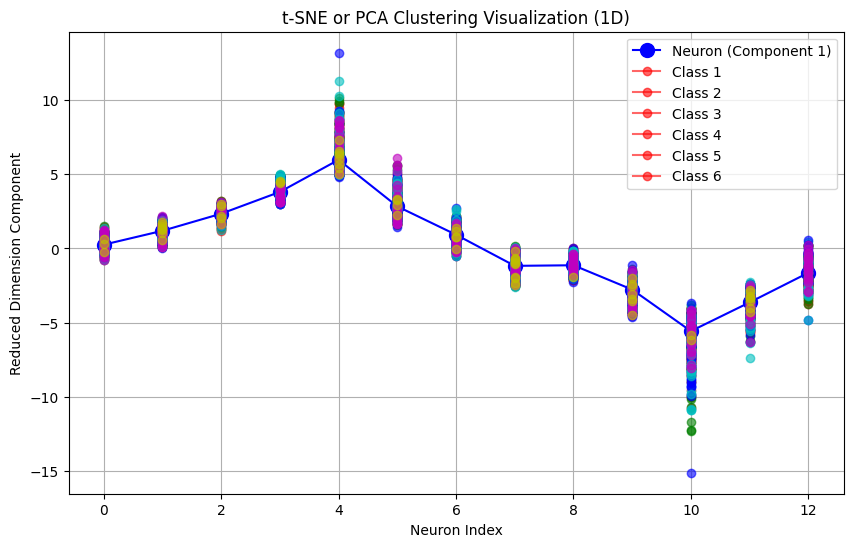

In [36]:
# Memanggil fungsi visualisasi dengan dataset PCA
visualize_reduced_features(X_pca, df["Class"].values, som_pca)

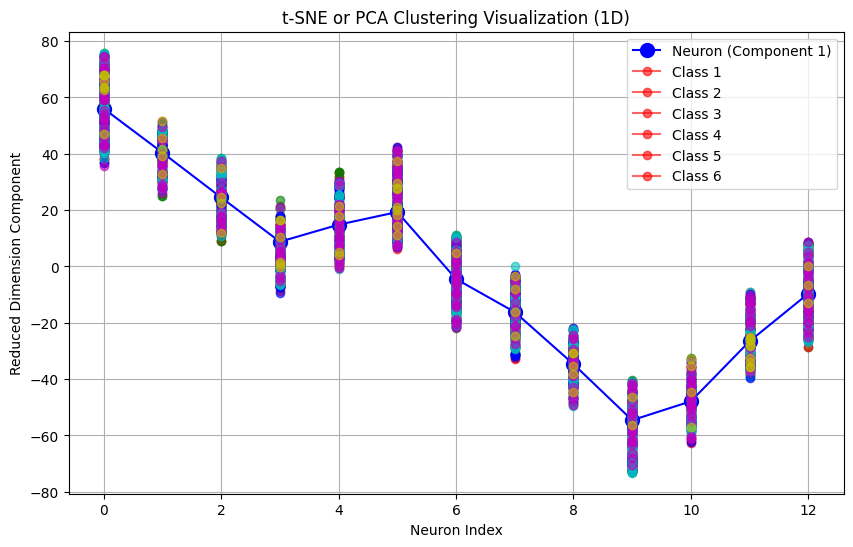

In [37]:
# Memanggil fungsi visualisasi dengan dataset t-sne
visualize_reduced_features(X_tsne, df["Class"].values, som_tsne)

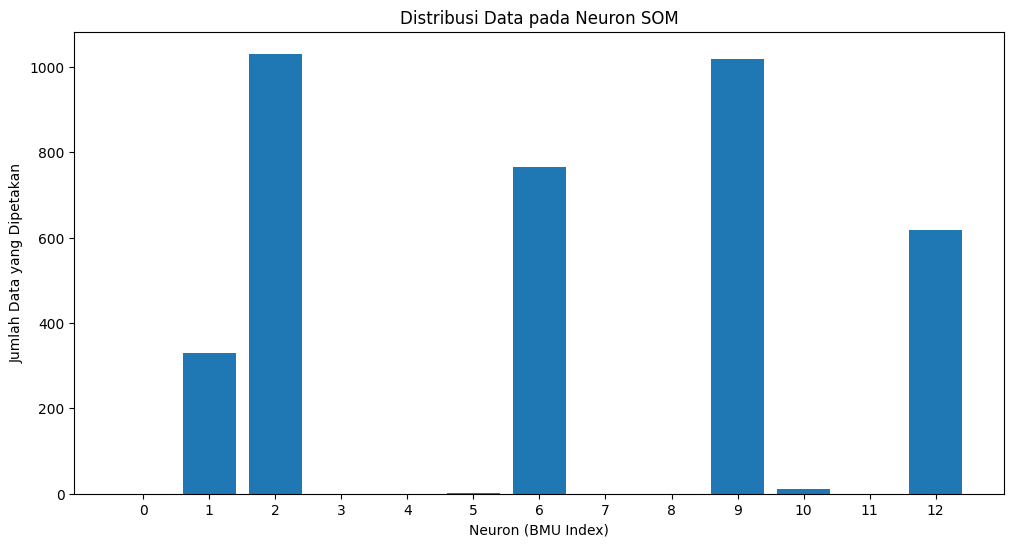

In [50]:
import matplotlib.pyplot as plt

# Menentukan BMU untuk setiap titik data
bmu_indices = [som_normal.hitung_bmu(x) for x in X_train_np]

# Membuat histogram untuk distribusi data pada setiap neuron
plt.figure(figsize=(12, 6))
plt.hist(bmu_indices, bins=range(m+1), align='left', rwidth=0.8)
plt.xlabel("Neuron (BMU Index)")
plt.ylabel("Jumlah Data yang Dipetakan")
plt.title("Distribusi Data pada Neuron SOM")
plt.xticks(range(m))
plt.show()


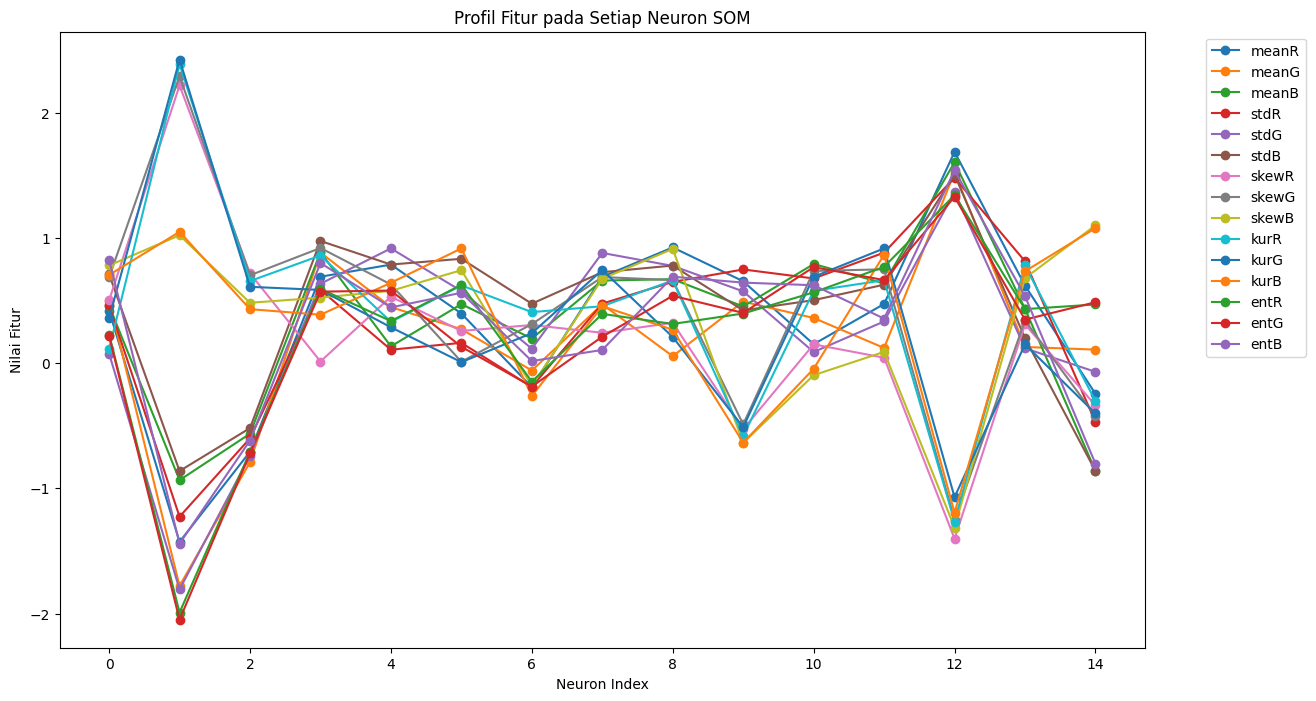

In [49]:
import pandas as pd

# Membuat DataFrame untuk profil neuron
weights_df = pd.DataFrame(weights_normal, columns=X_train.columns)

# Membuat plot untuk setiap fitur pada neuron
weights_df.plot(kind='line', figsize=(14, 8), marker='o')
plt.title("Profil Fitur pada Setiap Neuron SOM")
plt.xlabel("Neuron Index")
plt.ylabel("Nilai Fitur")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


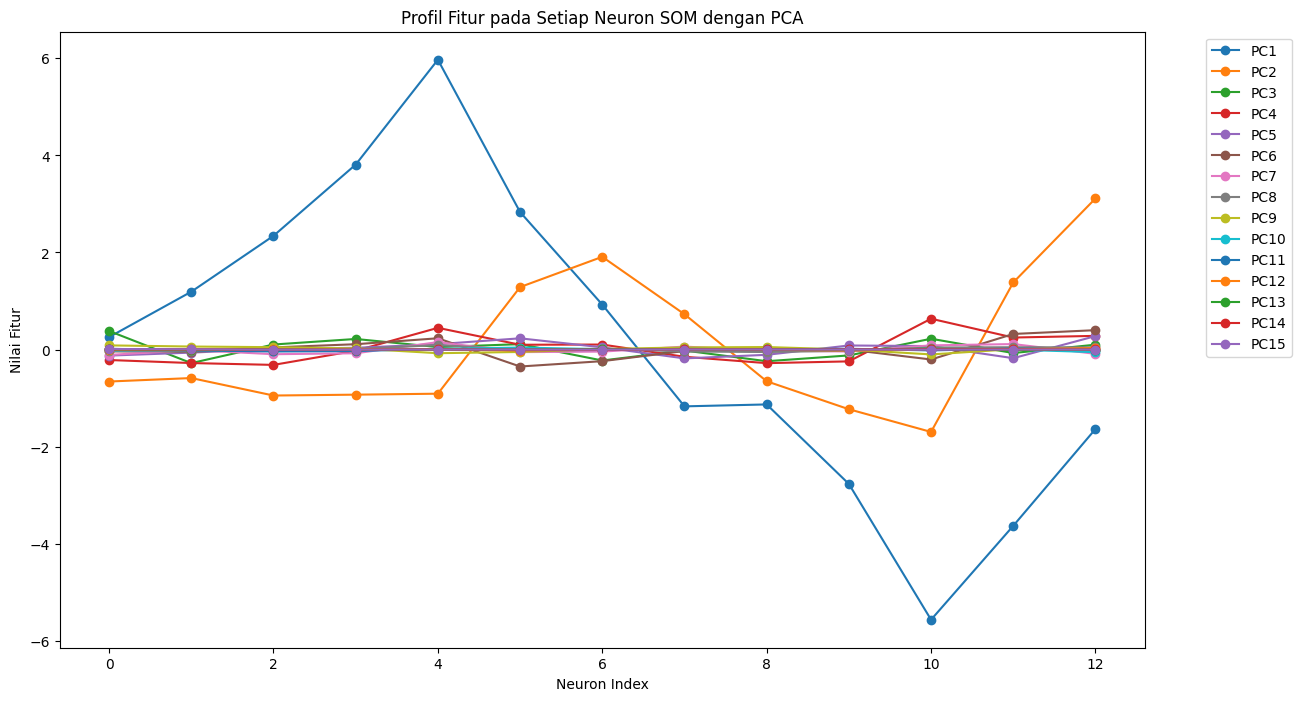

In [58]:
# Buat nama kolom untuk komponen utama hasil PCA
pca_columns = [f'PC{i+1}' for i in range(weights_pca.shape[1])]

# Membuat DataFrame untuk profil neuron
weights_df = pd.DataFrame(weights_pca, columns=pca_columns)

# Membuat plot untuk setiap fitur pada neuron
weights_df.plot(kind='line', figsize=(14, 8), marker='o')
plt.title("Profil Fitur pada Setiap Neuron SOM dengan PCA")
plt.xlabel("Neuron Index")
plt.ylabel("Nilai Fitur")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


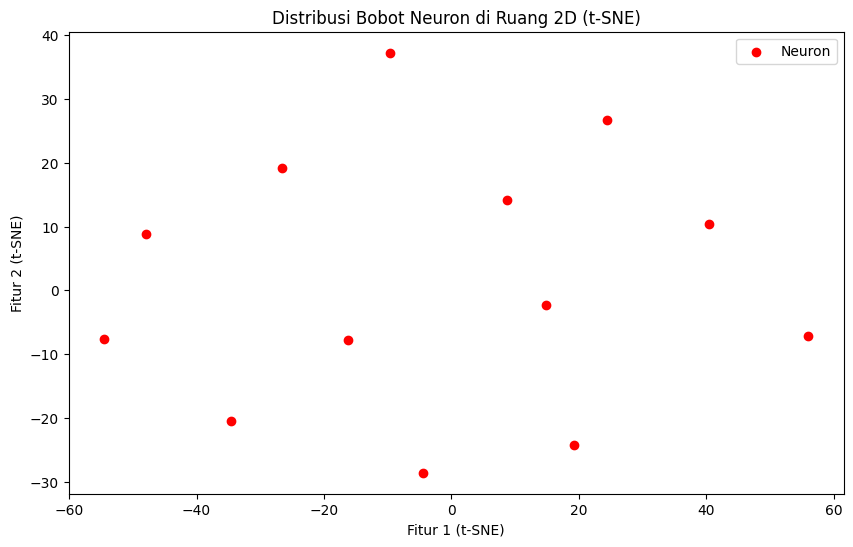

In [63]:
import matplotlib.pyplot as plt

# Visualisasi posisi bobot neuron di ruang 2D
plt.figure(figsize=(10, 6))

# Plot setiap neuron sebagai titik di ruang 2D
plt.scatter(weights_tsne[:, 0], weights_tsne[:, 1], c='red', marker='o', label="Neuron")
plt.title("Distribusi Bobot Neuron di Ruang 2D (t-SNE)")
plt.xlabel("Fitur 1 (t-SNE)")
plt.ylabel("Fitur 2 (t-SNE)")
plt.legend()
plt.show()


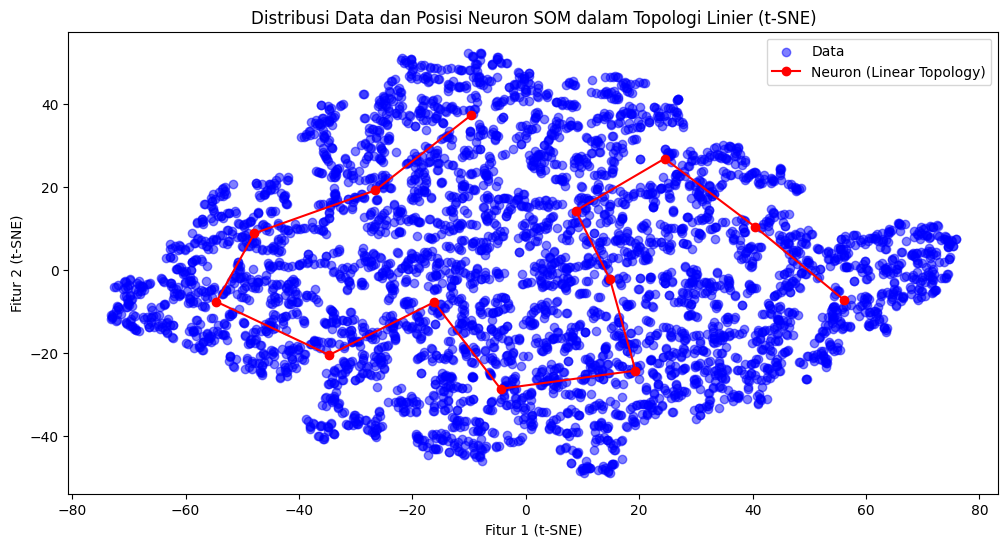

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi distribusi data dan posisi neuron dalam topologi linier
plt.figure(figsize=(12, 6))

# Plot data hasil t-SNE sebagai titik biru
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue', alpha=0.5, label="Data")

# Plot neuron dengan topologi linier sebagai titik merah
# Urutan neuron ditampilkan sebagai garis linier yang menghubungkan setiap neuron
plt.plot(weights_tsne[:, 0], weights_tsne[:, 1], 'r-o', label="Neuron (Linear Topology)")

plt.title("Distribusi Data dan Posisi Neuron SOM dalam Topologi Linier (t-SNE)")
plt.xlabel("Fitur 1 (t-SNE)")
plt.ylabel("Fitur 2 (t-SNE)")
plt.legend()
plt.show()


###Evaluasi 1

In [58]:
# Menghitung QE dan TE menggunakan numpy array (X_train_np)
qe = som_normal.quantization_error(X_train_np)
te = som_normal.topographic_error(X_train_np)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

Quantization Error (QE): 1.766319355461711
Topographic Error (TE): 0.9484969053934571


In [55]:
qe = som_pca.quantization_error(X_pca)
te = som_pca.topographic_error(X_pca)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

Quantization Error (QE): 1.4713804749691854
Topographic Error (TE): 0.3649425287356322


In [56]:
qe = som_tsne.quantization_error(X_tsne)
te = som_tsne.topographic_error(X_tsne)

print("Quantization Error (QE):", qe)
print("Topographic Error (TE):", te)

Quantization Error (QE): 11.060156206690465
Topographic Error (TE): 0.1240053050397878


In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

silhouette_avg = silhouette_score(X_train, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06274745154438173


In [ ]:
# Hitung Silhouette Score dengan label yang sesuai
silhouette_avg = silhouette_score(X_pca, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06274745154438607


In [ ]:
silhouette_avg = silhouette_score(X_tsne, y_train.values)  # Gunakan y_train untuk mencocokkan data pada X_pca
print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.06814402


In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
db_index = davies_bouldin_score(X_train, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 12.058537056774233


In [ ]:
db_index = davies_bouldin_score(X_pca, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 12.058537056774696


In [ ]:
db_index = davies_bouldin_score(X_tsne, y_train.values)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 18.487113981691717


In [ ]:
from somperf.metrics import *
from somperf.utils.topology import rectangular_topology_dist

In [ ]:
map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# Ambil bobot dari SOM hasil PCA yang sudah dilatih
weights_normal = som_normal.w  # weights_normal seharusnya berbentuk (6, 1)

# Hitung beberapa metrik menggunakan somperf
print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_normal))
print('Neighborhood Preservation =', neighborhood_preservation(1, weights_normal, X_train))
print('Trustworthiness =', trustworthiness(1, weights_normal, X_train))

Topographic Product = -0.03841065105903301
Neighborhood Preservation = -7.894317192184706
Trustworthiness = 0.894162591318731


In [ ]:
map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# Ambil bobot dari SOM hasil PCA yang sudah dilatih
weights_pca = som_pca.w  # weights_pca seharusnya berbentuk (6, 1)

# Hitung beberapa metrik menggunakan somperf
print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_pca))
print('Neighborhood Preservation =', neighborhood_preservation(1, weights_pca, X_pca))
print('Trustworthiness =', trustworthiness(1, weights_pca, X_pca))

Topographic Product = -0.043877150356329796
Neighborhood Preservation = -7.850278146998015
Trustworthiness = 0.8942105569765528


In [ ]:
map_size = (6, 1)  # 6 neurons in 1 row (linear SOM)

# Ambil bobot dari SOM hasil PCA yang sudah dilatih
weights_tsne = som_tsne.w  # weights_tsne seharusnya berbentuk (6, 1)

# Hitung beberapa metrik menggunakan somperf
print('Topographic Product =', topographic_product(rectangular_topology_dist(map_size), weights_tsne))
print('Neighborhood Preservation =', neighborhood_preservation(1, weights_tsne, X_tsne))
print('Trustworthiness =', trustworthiness(1, weights_tsne, X_tsne))

Topographic Product = -0.03893244276043883
Neighborhood Preservation = 0.03446227716271488
Trustworthiness = 0.9312427236759588


###Tuning